<a href="https://colab.research.google.com/github/JYoung998/Quant-Projects/blob/main/EstimateBetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt

#define stock symbols and time period
stock_symbols=['V', 'SPY']
start_date='2019-01-01'
end_date='2023-01-01'

stock_data=yf.download(stock_symbols, start=start_date, end=end_date)['Close']

print("Price Data")
print(stock_data.head())

#weekly returns
weekly_returns=stock_data.pct_change().resample('W').last()

weekly_returns=weekly_returns.dropna()

print("Weekly Returns")
print(weekly_returns.head())

#define the independent variable SPY y = a + xb
X = sm.add_constant(weekly_returns['SPY'])

#define dependent variable
y = weekly_returns['V']

model = sm.OLS(y,X).fit()

/tmp/ipython-input-2898571161.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data=yf.download(stock_symbols, start=start_date, end=end_date)['Close']
[*********************100%***********************]  2 of 2 completed

Price Data
Ticker             SPY           V
Date                              
2019-01-02  225.660156  126.840691
2019-01-03  220.275253  122.269798
2019-01-04  227.653549  127.537285
2019-01-07  229.448563  129.837082
2019-01-08  231.604309  130.543228
Weekly Returns
Ticker           SPY         V
Date                          
2019-01-06  0.033496  0.043081
2019-01-13  0.000386 -0.004399
2019-01-20  0.013310  0.008887
2019-01-27  0.008462  0.007044
2019-02-03  0.000482  0.038071


Regression Results:
                            OLS Regression Results                            
Dep. Variable:                      V   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     372.2
Date:                Tue, 04 Nov 2025   Prob (F-statistic):           3.91e-48
Time:                        16:43:35   Log-Likelihood:                 640.70
No. Observations:                 209   AIC:                            -1277.
Df Residuals:                     207   BIC:                            -1271.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.001

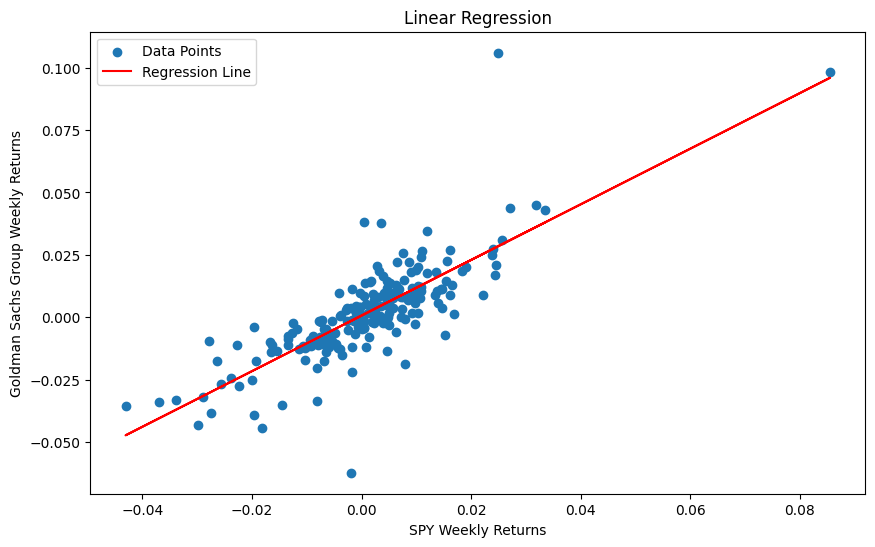

In [9]:
print("Regression Results:")
print(model.summary())
plt.figure(figsize=(10,6))
plt.scatter(weekly_returns['SPY'], weekly_returns['V'], label='Data Points')
plt.plot(weekly_returns['SPY'], model.predict(X), color='red', label='Regression Line')
plt.title('Linear Regression')
plt.xlabel('SPY Weekly Returns')
plt.ylabel('Goldman Sachs Group Weekly Returns')
plt.legend()
plt.show()
